<a href="https://colab.research.google.com/github/Maneesh-dev19/Data-Analytics/blob/main/WineQuality_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
red_wine= pd.read_csv('/content/gdrive/My Drive/ML_lab/winequality-red.csv', sep=';')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white_wine= pd.read_csv('/content/gdrive/My Drive/ML_lab/winequality-white.csv', sep=';')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
print (" number of duplicates in red wine:  "+str(np.sum(np.array(red_wine.duplicated()))))
print('\n')
print (" number of duplicates in white wine:  "+str(np.sum(np.array(white_wine.duplicated()))))

 number of duplicates in red wine:  240


 number of duplicates in white wine:  937


Number of examples with each target value for the two datasets

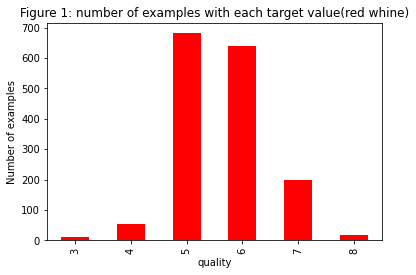

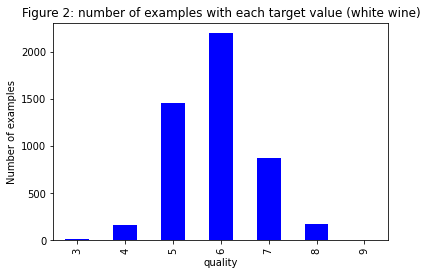

In [ ]:
red_counts=red_wine.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 1: number of examples with each target value(red whine)')
red_counts.plot(kind='bar',color='r')
plt.show()

white_counts=white_wine.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 2: number of examples with each target value (white wine)')
white_counts.plot(kind='bar',color='b')
plt.show()

**Linear regression.**

---



---



In [ ]:
import warnings
warnings.filterwarnings('ignore')


 Randomly splitting the data into a training and test set.

In [ ]:
n=len(red_wine)
split=n*0.7
indices=np.arange(n)
np.random.shuffle(indices)

In [ ]:
train_red=red_wine.iloc[indices,:]
test_red=red_wine.iloc[indices,:]

Fitting a linear regression to the Data.

In [ ]:
train_red_X=train_red.iloc[:,:-1].values
train_red_X=np.insert(train_red_X,0,1,axis=1)
train_red_t=train_red.iloc[:,-1:].values
red_w=np.linalg.inv(train_red_X.transpose().dot(train_red_X))\
.dot(train_red_X.transpose()).dot(train_red_t)

taking X and t for test data and making predictions:

In [ ]:
test_red_X=test_red.iloc[:,:-1].values
test_red_X=np.insert(test_red_X,0,1,axis=1)
test_red_t=test_red.iloc[:,-1:].values
predictions=test_red_X.dot(red_w)

 Making a scatter plot of the predictions versus true targets.


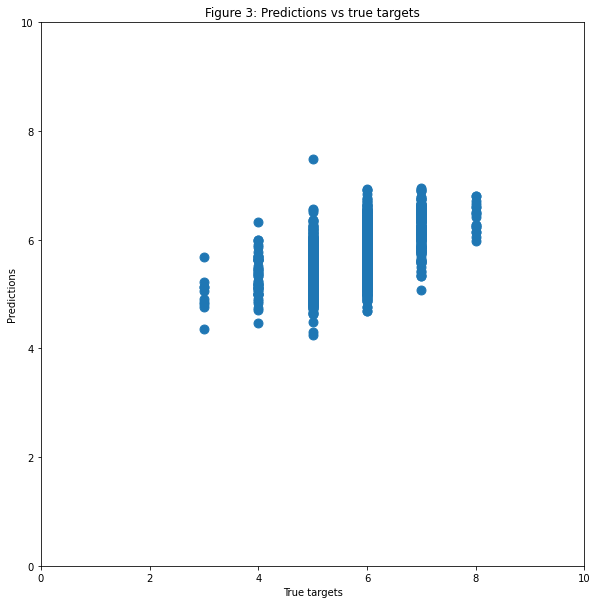

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Figure 3: Predictions vs true targets')
plt.xlabel('True targets')
plt.ylabel('Predictions')
plt.xlim(0,10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(test_red_t,predictions,s=80,marker='o')
plt.show()


squared mean error

In [ ]:
mean_error= np.mean(np.square(predictions-test_red_t))
print ("mean square error:  " +str(mean_error))

mean square error:  0.416767167221408


Regularized linear regression

In [ ]:
def reg_linear_reg(X,t,lmbda):
    K=X.shape[1]
    I=np.identity(K)
    I[0][0]=0
    return (np.linalg.inv(X.transpose().dot(X)+lmbda*I)\
        .dot(X.transpose()).dot(t))



training regularized linear regression for different regularization
parameters and calculating MSE.


In [ ]:
lambdas=np.array([10**(i-6) for i in range(0,8)])
MSEs=[]
for lmbda in lambdas:
    red_wreg=reg_linear_reg(train_red_X,train_red_t,lmbda)
    predictions=test_red_X.dot(red_wreg)
    MSEs.append(np.mean(np.square(predictions-test_red_t)))


Making a plot of MSE versus regularization parameter:

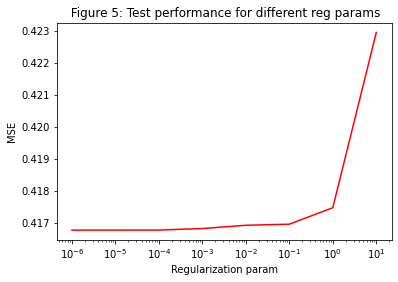

best MSE: 0.41676716744363235

best regularization parameter:1e-06


In [ ]:
plt.xlabel("Regularization param")
plt.xscale('log')
plt.ylabel("MSE")
plt.title(' Figure 5: Test performance for different reg params')
plt.plot(lambdas,MSEs,color='r')
plt.show()
print("best MSE: "+str(np.min(MSEs))+"\n")
print("best regularization parameter:"+str(lambdas[np.argmin(MSEs)]))


Performing 10 fold cross validation and selecting best regularization parameter:

In [ ]:
Nfold=10
N=train_red_X.shape[0]
folds=[int(N/Nfold) for i in range(Nfold)]
cfolds=np.cumsum(folds)
cfolds=np.insert(cfolds,0,0)
params=np.array([10**(i-6) for i in range(0,8)])
errors=[ [] for i in range(len(params))]
c=0
for param in params:
    for f in range(Nfold):
            trainX=train_red_X
            traint=train_red_t
            # remove test points
            np.delete(trainX,range(cfolds[f],cfolds[f+1]),0)
            np.delete(traint,range(cfolds[f],cfolds[f+1]),0)
            # Creating test points:
            testX = train_red_X[cfolds[f]:cfolds[f+1]]
            testt = train_red_t[cfolds[f]:cfolds[f+1]]
            # training regularized linear regression and making preds
            wreg=reg_linear_reg(trainX,traint,param)
            preds=testX.dot(wreg)
            err=np.mean(np.square(preds-testt))
            errors[c].append(err)
    c+=1

mean_errors=[np.mean(error) for error in errors]
index_min=np.argmin(mean_errors)
print("best parameter:   "+str(params[index_min]))

best parameter:   1e-06


Making a plot of MSE versus regularization parameter:

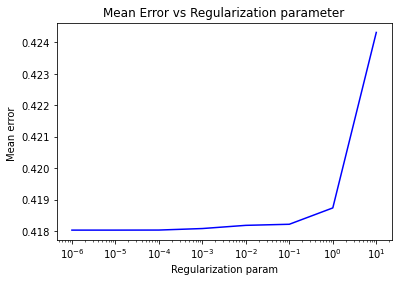

In [ ]:
plt.title('Mean Error vs Regularization parameter')
plt.xlabel("Regularization param")
plt.xscale('log')
plt.ylabel("Mean error ")
plt.plot(params,mean_errors,color='b')
plt.show()


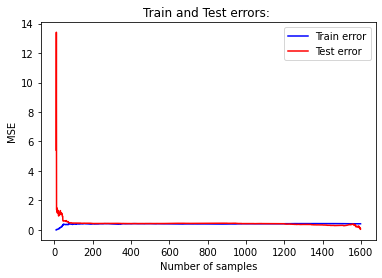

In [ ]:
Error_train=[]
Error_test=[]
for m in np.arange(10,N):
    train_X_m=train_red_X[:m]
    train_t_m=train_red_t[:m]
    test_X_m=train_red_X[m:]
    test_t_m=train_red_t[m:]
    w_m=reg_linear_reg(train_X_m,train_t_m,10**(-6))
    preds_train=train_X_m.dot(w_m)
    preds_test=test_X_m.dot(w_m)
    Error_train.append(np.mean(np.square(preds_train-train_t_m)))
    Error_test.append(np.mean(np.square(preds_test-test_t_m)))

plt.title('Train and Test errors: ')
Train, =plt.plot(np.arange(10,N),Error_train,color='b',label='Train error')
Test, =plt.plot(np.arange(10,N),Error_test,color='r',label='Test error')
plt.ylabel('MSE')
plt.xlabel('Number of samples')
plt.legend(handles=[Train,Test])